### 📌 1. Importación de Librerías y Carga de Datos
Para iniciar el análisis, importamos las librerías necesarias y cargamos el dataset.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("IMDB-Movie-Data.csv")

In [14]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### 📌 3. Análisis General del Dataset  
Revisamos el tamaño del dataset, tipos de datos, valores nulos y duplicados.


In [15]:
# Dimensiones del dataset
print("Forma del dataset:", data.shape)

# Información general
data.info()

# Revisar valores nulos
print("\nValores nulos por columna:\n", data.isnull().sum())

# Eliminar valores nulos
data = data.dropna()

# Revisar duplicados
print("\nDatos duplicados:", data.duplicated().sum())

# Eliminar duplicados
data = data.drop_duplicates()


Forma del dataset: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB

Valores nulos por columna:
 Rank                    0
Title                   0
Genre                   0
Descript

### 📌 4. Número de Películas por Año   
Visualizamos cuántas películas se estrenaron cada año.


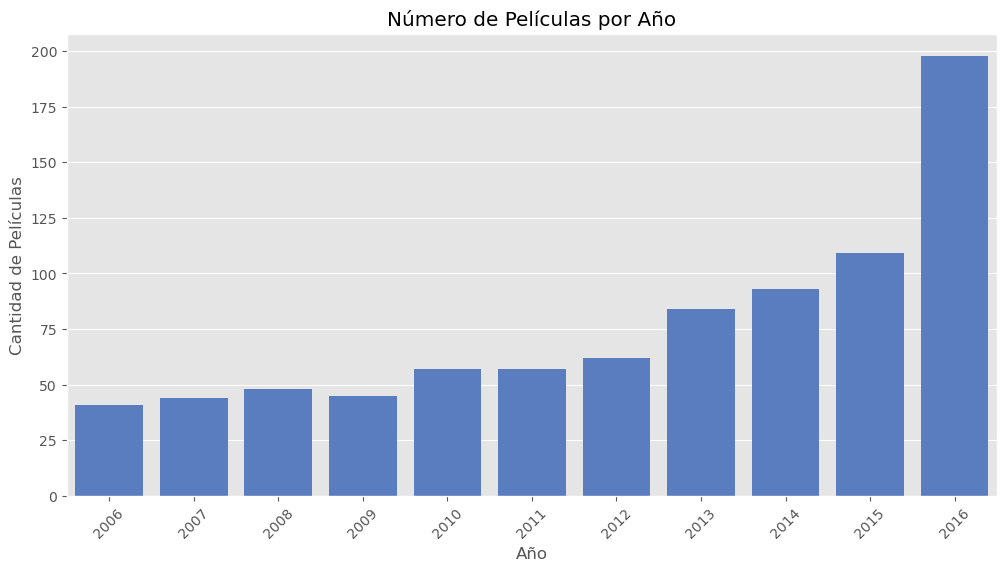

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x="Year", data=data)
plt.title("Número de Películas por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Películas")
plt.xticks(rotation=45)
plt.show()


### 📌 5. Películas con Duración Mayor o Igual a 180 Minutos
Se listan todas las películas con una duración mayor o igual a 180 minutos.



In [25]:
long_movies = data[data['Runtime (Minutes)'] >= 180][['Title', 'Runtime (Minutes)']]
long_movies


,Title,Runtime (Minutes)
82,The Wolf of Wall Street,180
88,The Hateful Eight,187
311,La vie d'Adèle,180


### 📌 6. Año con el Mayor Promedio de Votaciones
Identificamos el año en el que las películas recibieron la mayor cantidad promedio de votos.


In [27]:
avg_votes_per_year = data.groupby("Year")["Votes"].mean()
highest_avg_votes_year = avg_votes_per_year.idxmax()
print(f"Año con mayor promedio de votos: {highest_avg_votes_year}")


Año con mayor promedio de votos: 2012


### 📌 7. Año con el Mayor Promedio de Ingresos
Analizamos qué año tuvo el mayor promedio de ingresos por película.


In [28]:
avg_revenue_per_year = data.groupby("Year")["Revenue (Millions)"].mean()
highest_avg_revenue_year = avg_revenue_per_year.idxmax()
print(f"Año con mayor promedio de ingresos: {highest_avg_revenue_year}")


Año con mayor promedio de ingresos: 2009


### 📌 8. Promedio de Calificación por Director
Calculamos el promedio de calificación para cada director y mostramos los 10 mejores.


In [31]:
avg_rating_director = data.groupby("Director")["Rating"].mean().sort_values(ascending=False)
avg_rating_director.head(10)


Director
Christopher Nolan                   8.68
Makoto Shinkai                      8.60
Olivier Nakache                     8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
Damien Chazelle                     8.40
Thomas Vinterberg                   8.30
Rajkumar Hirani                     8.30
Lee Unkrich                         8.30
Pete Docter                         8.25
Name: Rating, dtype: float64

### 📌 9. Top 10 Películas Más Largas
Se listan las 10 películas con mayor duración.


In [33]:
top_long_movies = data[['Title', 'Runtime (Minutes)']].nlargest(10, 'Runtime (Minutes)')
top_long_movies


,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


### 📌 10. Película Más Popular por Ingresos
Se muestra la película con los mayores ingresos.


In [47]:
most_popular_movie = data.loc[data["Revenue (Millions)"].idxmax(), ["Title", "Revenue (Millions)"]]
print(f"La película más taquillera es '{most_popular_movie['Title']}' con una recaudación de {most_popular_movie['Revenue (Millions)']} millones de dólares.")



La película más taquillera es 'Star Wars: Episode VII - The Force Awakens' con una recaudación de 936.63 millones de dólares.


### 📌 11. Relación entre Calificación y Recaudación
Se analiza si existe una correlación entre la calificación de una película y sus ingresos.


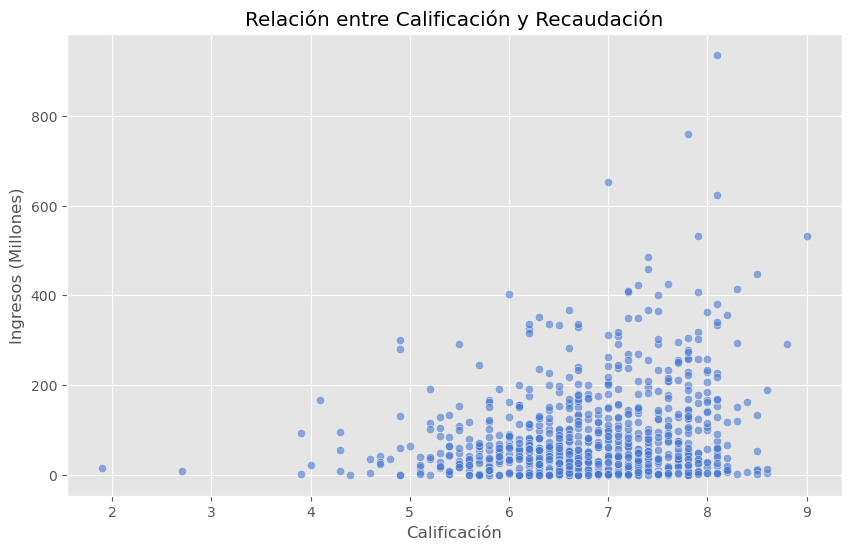

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data["Rating"], y=data["Revenue (Millions)"], alpha=0.6)
plt.title("Relación entre Calificación y Recaudación")
plt.xlabel("Calificación")
plt.ylabel("Ingresos (Millones)")
plt.show()
